In [ ]:
#Lesson 5: https://qiskit.org/textbook/ch-gates/phase-kickback.html

In [2]:
#Create modules 
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from math import pi
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_state_qsphere

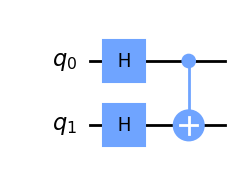

<IPython.core.display.Latex object>

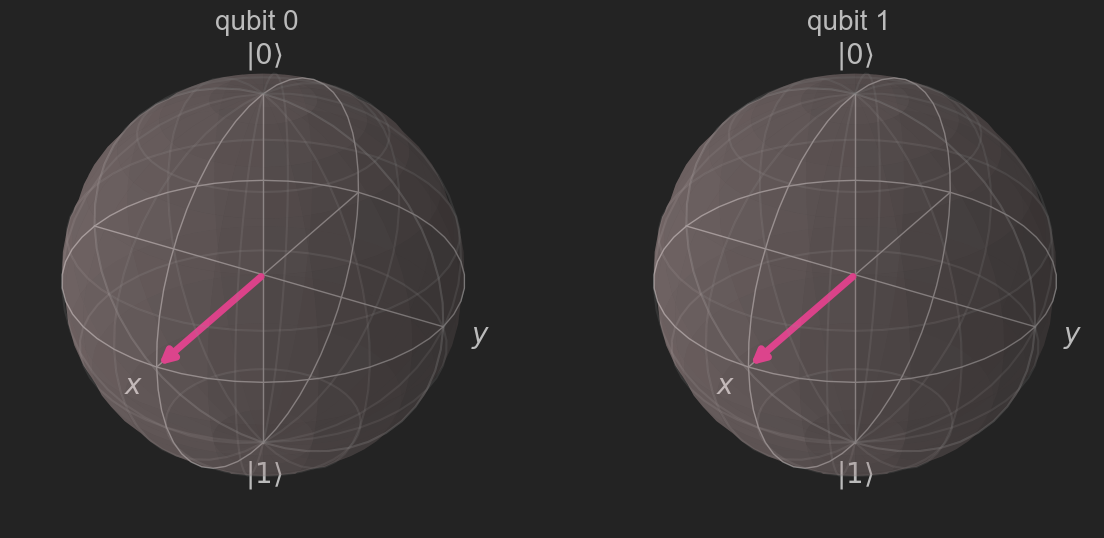

In [4]:
#Create a 2 qubit system with an h gate on each qbit and a cnot gate from q0 to q1
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw(output = 'mpl'))  # `display` is a command for Jupyter notebooks
                                 # similar to `print`, but for rich content

# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

"""
We created |-+> which equals 0.5(|00> + |01> - |10> - |11>) where, 

|00> = [ 1 0 0 0 ]
|01> = [ 0 1 0 0 ]
|10> = [ 0 0 1 0 ]
|11> = [ 0 0 0 1 ]
"""

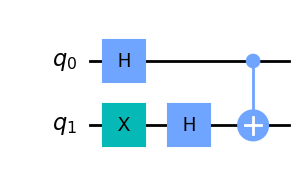

<IPython.core.display.Latex object>

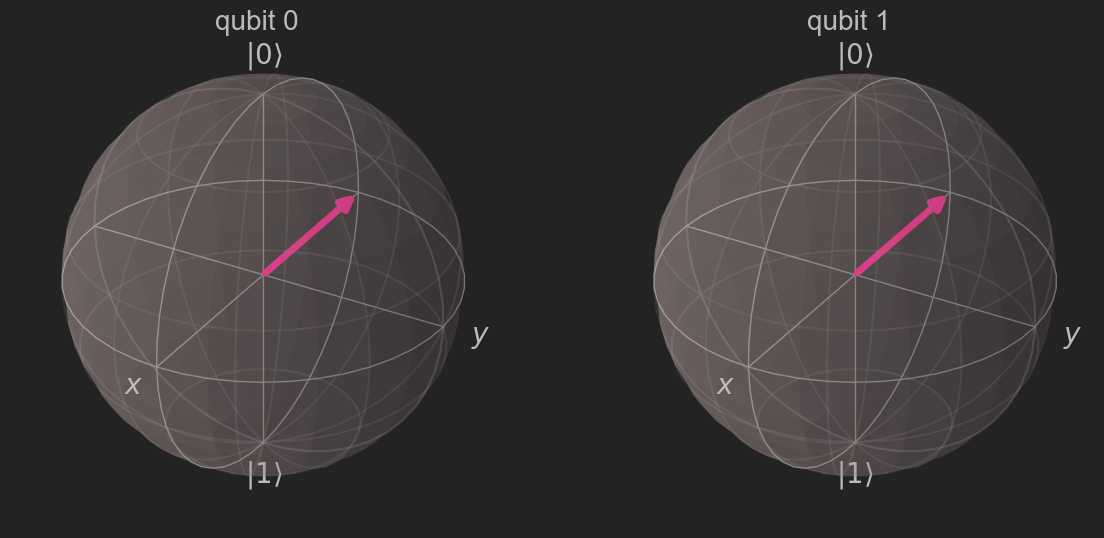

In [8]:

#Create CNOT(|-+>) on the 2 qubit system, which is the same as |-->
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
display(qc.draw(output = 'mpl'))

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)


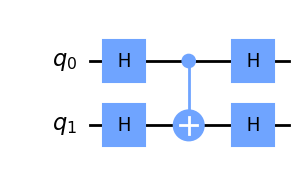

<IPython.core.display.Latex object>

In [10]:
#We Apply the gate diagram below to get the alternate CNOT() which goes from q1 to q0 instead of q0 to q1
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw(output = 'mpl')) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

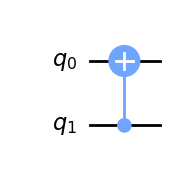

<IPython.core.display.Latex object>

In [13]:
#Check if this is true
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw(output = 'mpl'))
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

#This is an important identity because some qunatum hardware can only allow a CNOT in one direction 

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

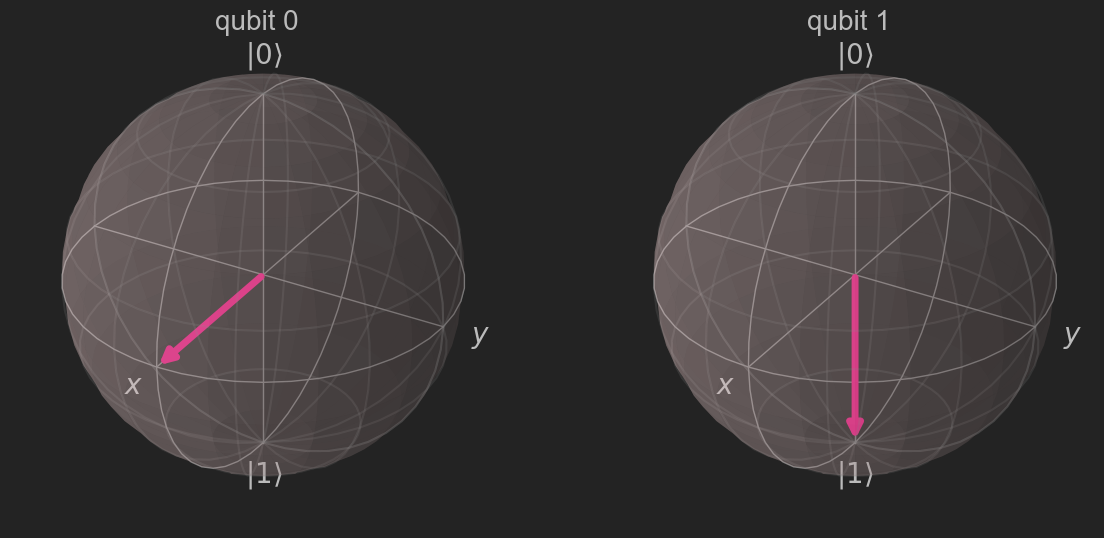

In [15]:
#Kick back of the T-gate
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw(output = 'mpl'))
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)



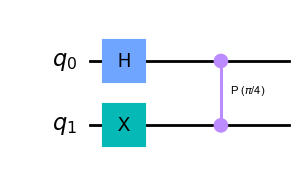

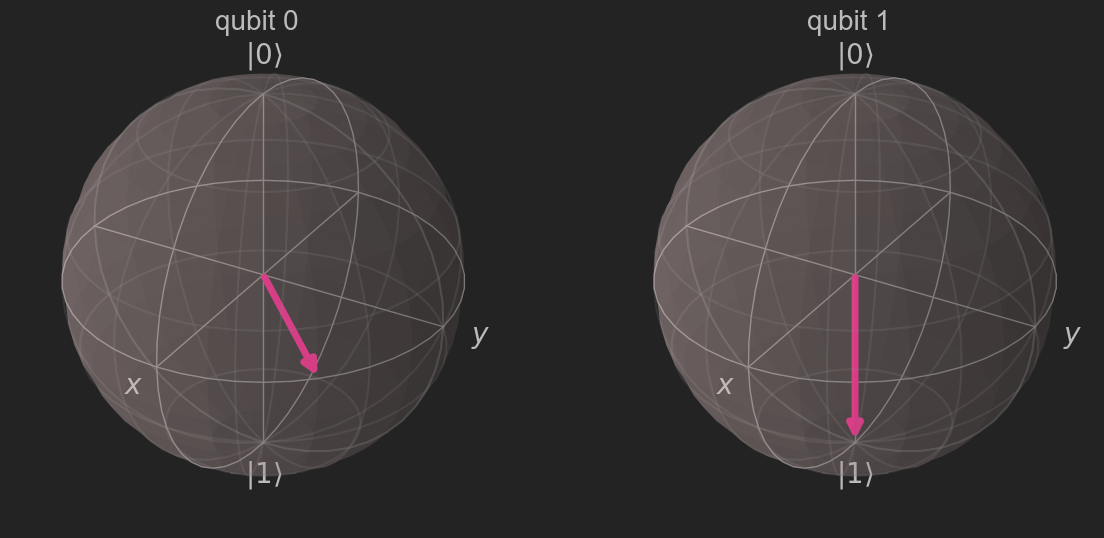

In [17]:
#We rotated the left qubit by pi/4 in the plane perpendicular to the Z axis
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw(output = 'mpl'))
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)
